# ESCA 1vsAll Volcano Plots
Andrew E. Davidson  
aedavids@ucsc.edu  
5/1/24

Copyright (c) 2020-2023, Regents of the University of California All rights reserved. https://polyformproject.org/licenses/noncommercial/1.0.0

ref: extraCellularRNA/terra/jupyterNotebooks/cibersort/volcanoPlots.ipynb

default fonts where missing on mustard
```
conda install -c conda-forge matplotlib-fontconfig
conda install -c conda-forge font-awesome
rm ~/.cache/
```

In [1]:
import ipynbname
from IPython.display import display
from IPython.display import Image
import numpy as np
import pathlib as pl
import pandas as pd
import os
import sys

notebookName = ipynbname.name()
notebookPath = ipynbname.path()
notebookDir = os.path.dirname(notebookPath)

outDir = f'{notebookDir}/{notebookName}.out'
os.makedirs(outDir, exist_ok=True)
print(f'outDir:\n{outDir}')

imgOut = f'{outDir}/img'
os.makedirs(imgOut, exist_ok=True)
print(f'\nimgOut :\n{imgOut}')

outDir:
/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out

imgOut :
/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img


/data/tmp/ipykernel_1749332/625474849.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# setting the python path allows us to run python scripts from using
# the CLI. 
PYTHONPATH = os.environ['PYTHONPATH']
print("ORIG_PYTHONPATH: {}\n".format(PYTHONPATH))

gitRepoRoot = !git rev-parse --show-toplevel
gitRepoRoot = gitRepoRoot[0]


#
# add deseq modules
#
deseqModules = f'{gitRepoRoot}/terra/deseq/python'
# deseqModules = f'{gitRepoRoot}/terra'
print("deseqModules: {}\n".format(deseqModules))

PYTHONPATH = PYTHONPATH + f':{deseqModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))

#
# add deconvolutionAnalysis modules
#
deconvolutionModules = f'{gitRepoRoot}/deconvolutionAnalysis/python'
print("deconvolutionModules: {}\n".format(deconvolutionModules))

PYTHONPATH = PYTHONPATH + f':{deconvolutionModules}'
print("PYTHONPATH: {}\n".format(PYTHONPATH))


#
# to be able to import our local python files we need to set the sys.path
# https://stackoverflow.com/a/50155834
#
sys.path.append( str(deseqModules) )
sys.path.append( str(deconvolutionModules) )
print("\nsys.path:\n{}\n".format(sys.path))

ORIG_PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src

deseqModules: /private/home/aedavids/extraCellularRNA/terra/deseq/python

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/deseq/python

deconvolutionModules: /private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python

PYTHONPATH: :/private/home/aedavids/extraCellularRNA/src:/private/home/aedavids/extraCellularRNA/terra/deseq/python:/private/home/aedavids/extraCellularRNA/deconvolutionAnalysis/python


sys.path:
['/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks', '/private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks', '/private/home/aedavids/extraCellularRNA/src', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python311.zip', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python3.11', '/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python3.11/lib-dynload', '', '/private/ho

In [3]:
#local imports
from analysis.utilities import saveList
from pipeline.dataFactory.utilities import urlify
from plots import volcanoPlots
# from deseq.python.plots import volcanoPlots

In [4]:
# load data
dataRoot = '/private/groups/kimlab/GTEx_TCGA/1vsAll'
deseqResultsFileName = "ESCA_vs_all.results"
deseqResultsFilePath = f'{dataRoot}/{deseqResultsFileName}'
print(deseqResultsFilePath)

/private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results


In [5]:
%%time

def createVolcanoPlot(deseqResults, 
                      imgFilePath, 
                      numHeaderLines, 
                      plotTitle=None, 
                      geneNamesPath=None,
                      plotNames=True):
    '''
    arguments:
        pythonPath:
            set PYTHONPATH to this value. required to find volcano plot code
        deseqResults:
            example: /private/groups/kimlab/GTEx_TCGA/1vsAll/Kidney_Cortex_vs_all.results
            
        imgFilePath: 
            file path to save image with
            
        numHeaderLines
            integer: number of lines at the top of the results file to skip
            
        plotTitle:
            string: plot title string
            
        geneNamesPath
            file that contains genes we want to color red
            
    returns exit status
    '''

    if geneNamesPath:
        if not plotNames :
            arguments ='''--inputFile {} \\
                            --title '{}' \\
                            --output {}  \\
                            --numHeaderLines {} \\
                            --geneNamesFile {}'''.format(deseqResults, 
                                                       plotTitle, 
                                                       imgFilePath, 
                                                       numHeaderLines, 
                                                       geneNamesPath)
        else :
            arguments ='''--inputFile {} \\
                            --title '{}' \\
                            --output {}  \\
                            --numHeaderLines {} \\
                             --geneNamesFile {} \\
                            --label'''.format(deseqResults, 
                                                       plotTitle, 
                                                       imgFilePath, 
                                                       numHeaderLines,
                                                        geneNamesPath
                                                         )
           
    else :
        arguments ='''--inputFile {} \\
                        --title '{}' \\
                        --output {}  \\
                        --numHeaderLines {}'''.format(deseqResults, 
                                                   plotTitle, 
                                                   imgFilePath, 
                                                   numHeaderLines)
    print("arguments:\n{}".format(arguments))
    
    exitStatus = ! (export PYTHONPATH=$PYTHONPATH; python -m plots.volcanoPlots $arguments)
    print("exit status:{}".format(exitStatus))
    return exitStatus


CPU times: user 174 µs, sys: 7 µs, total: 181 µs
Wall time: 636 µs


aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll.png
arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results \
                        --title 'ESCA_vs_all.results 1vsAll' \
                        --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll.png  \
                        --numHeaderLines 8
exit status:['DEBUG cli.args.geneNamesFile:None', '############## AEDWIP plotNames:False']
CPU times: user 16.5 ms, sys: 2.53 ms, total: 19 ms
Wall time: 3min 10s


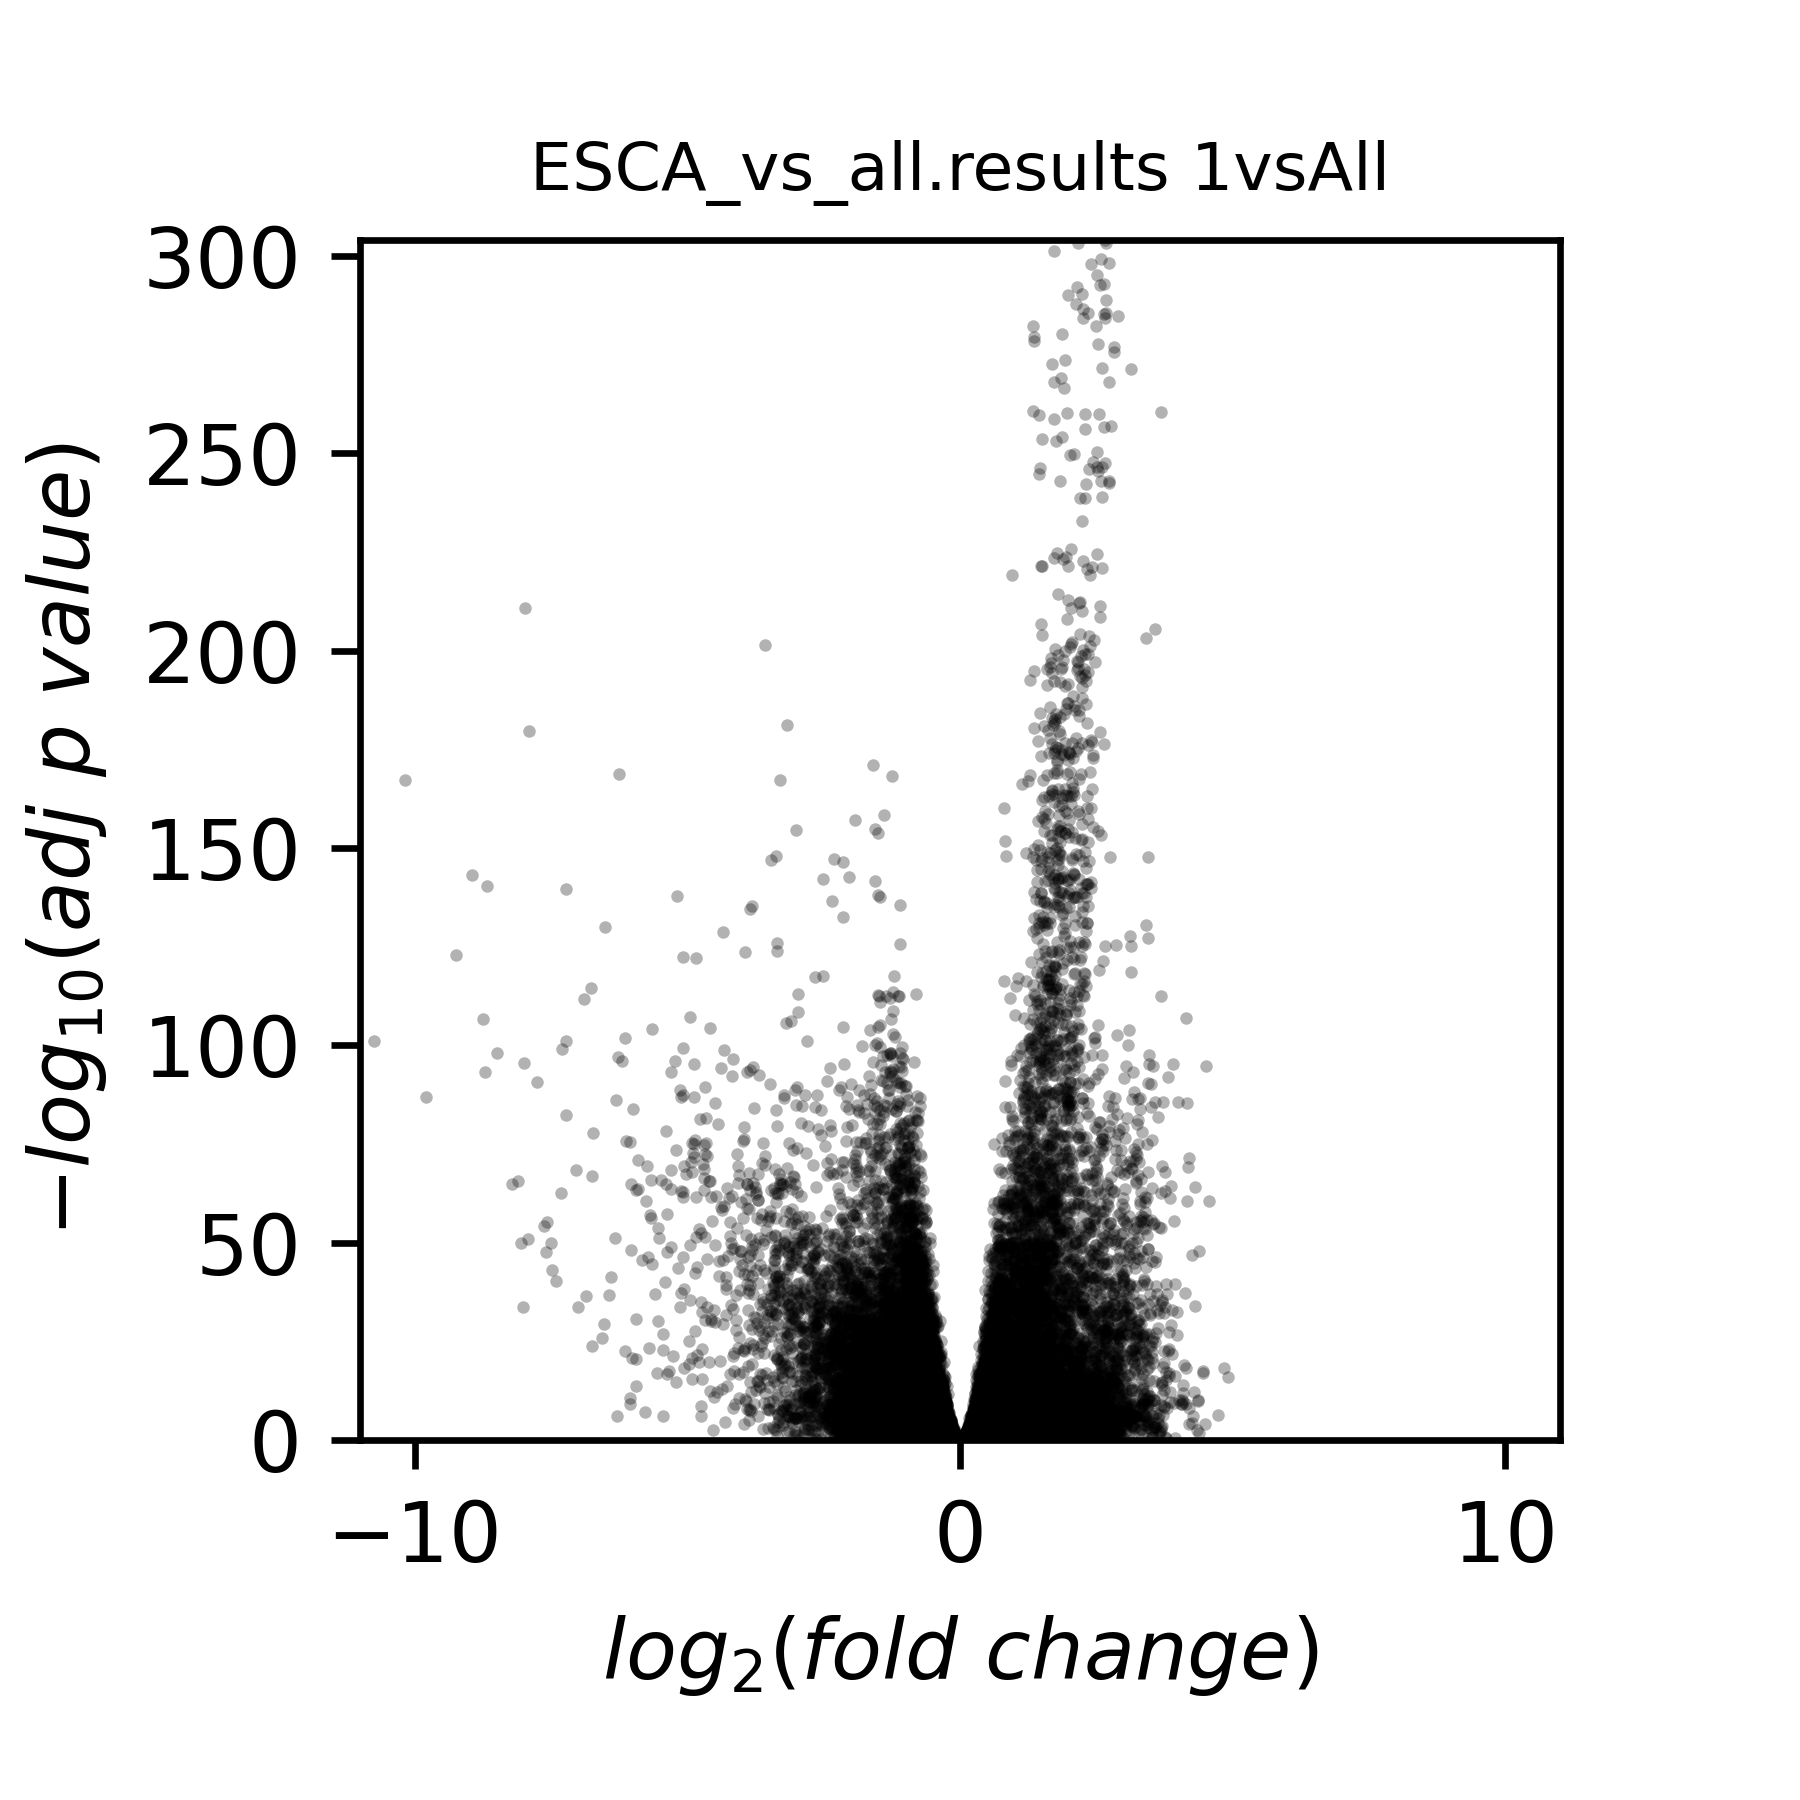

In [7]:
%%time
def plotAllNoColor() -> (str, str) :
    plotTitle = "{} 1vsAll".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8
                    
    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=None)
    
    
          
    return (exitStatus, imgFilePath)

################################################################################
# generate plot
exitStatus, imgFilePath = plotAllNoColor()

# display
Image(imgFilePath)   

# <span style="color:red;background-color:yellow">Color TE's</span>

In [8]:
%%time
# repeatInfoFilePath = '/private/groups/kimlab/GTEx_TCGA/groupbyGeneTrainingSets/named_ucsc.rmsk.insert.info.txt'
repeatInfoFilePath = '/private/groups/kimlab/genomes.annotations/genomes.annotations/gencode.39/named_ucsc.rmsk.insert.info.txt'
print(repeatInfoFilePath)
repeatDF = pd.read_csv(repeatInfoFilePath, sep="\t", index_col='insert')
print(f'repeatDF.shape : {repeatDF.shape}')
repeatDF.iloc[0:5, :]

/private/groups/kimlab/genomes.annotations/genomes.annotations/gencode.39/named_ucsc.rmsk.insert.info.txt
repeatDF.shape : (15625, 2)
CPU times: user 13.9 ms, sys: 19.1 ms, total: 33 ms
Wall time: 55.4 ms


,clade,family
insert,,
(TAACCC)n,Simple_repeat,Simple_repeat
TAR1,Satellite,telo
L1MC5a,LINE,L1
MER5B,DNA,hAT-Charlie
MIR3,SINE,MIR


aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-TEs.png
len(selectTERows) : 15625 sum : 835 
arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results \
                            --title 'ESCA_vs_all.results 1vsAll TEs' \
                            --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-TEs.png  \
                            --numHeaderLines 8 \
                            --geneNamesFile /scratch/aedavids/tmp/plotRepeatsGeneNames.txt
exit status:['DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/plotRepeatsGeneNames.txt', '############## AEDWIP plotNames:False']
CPU times: user 11.7 ms, sys: 9.95 ms, total: 21.6 ms
Wall time: 2min 12s


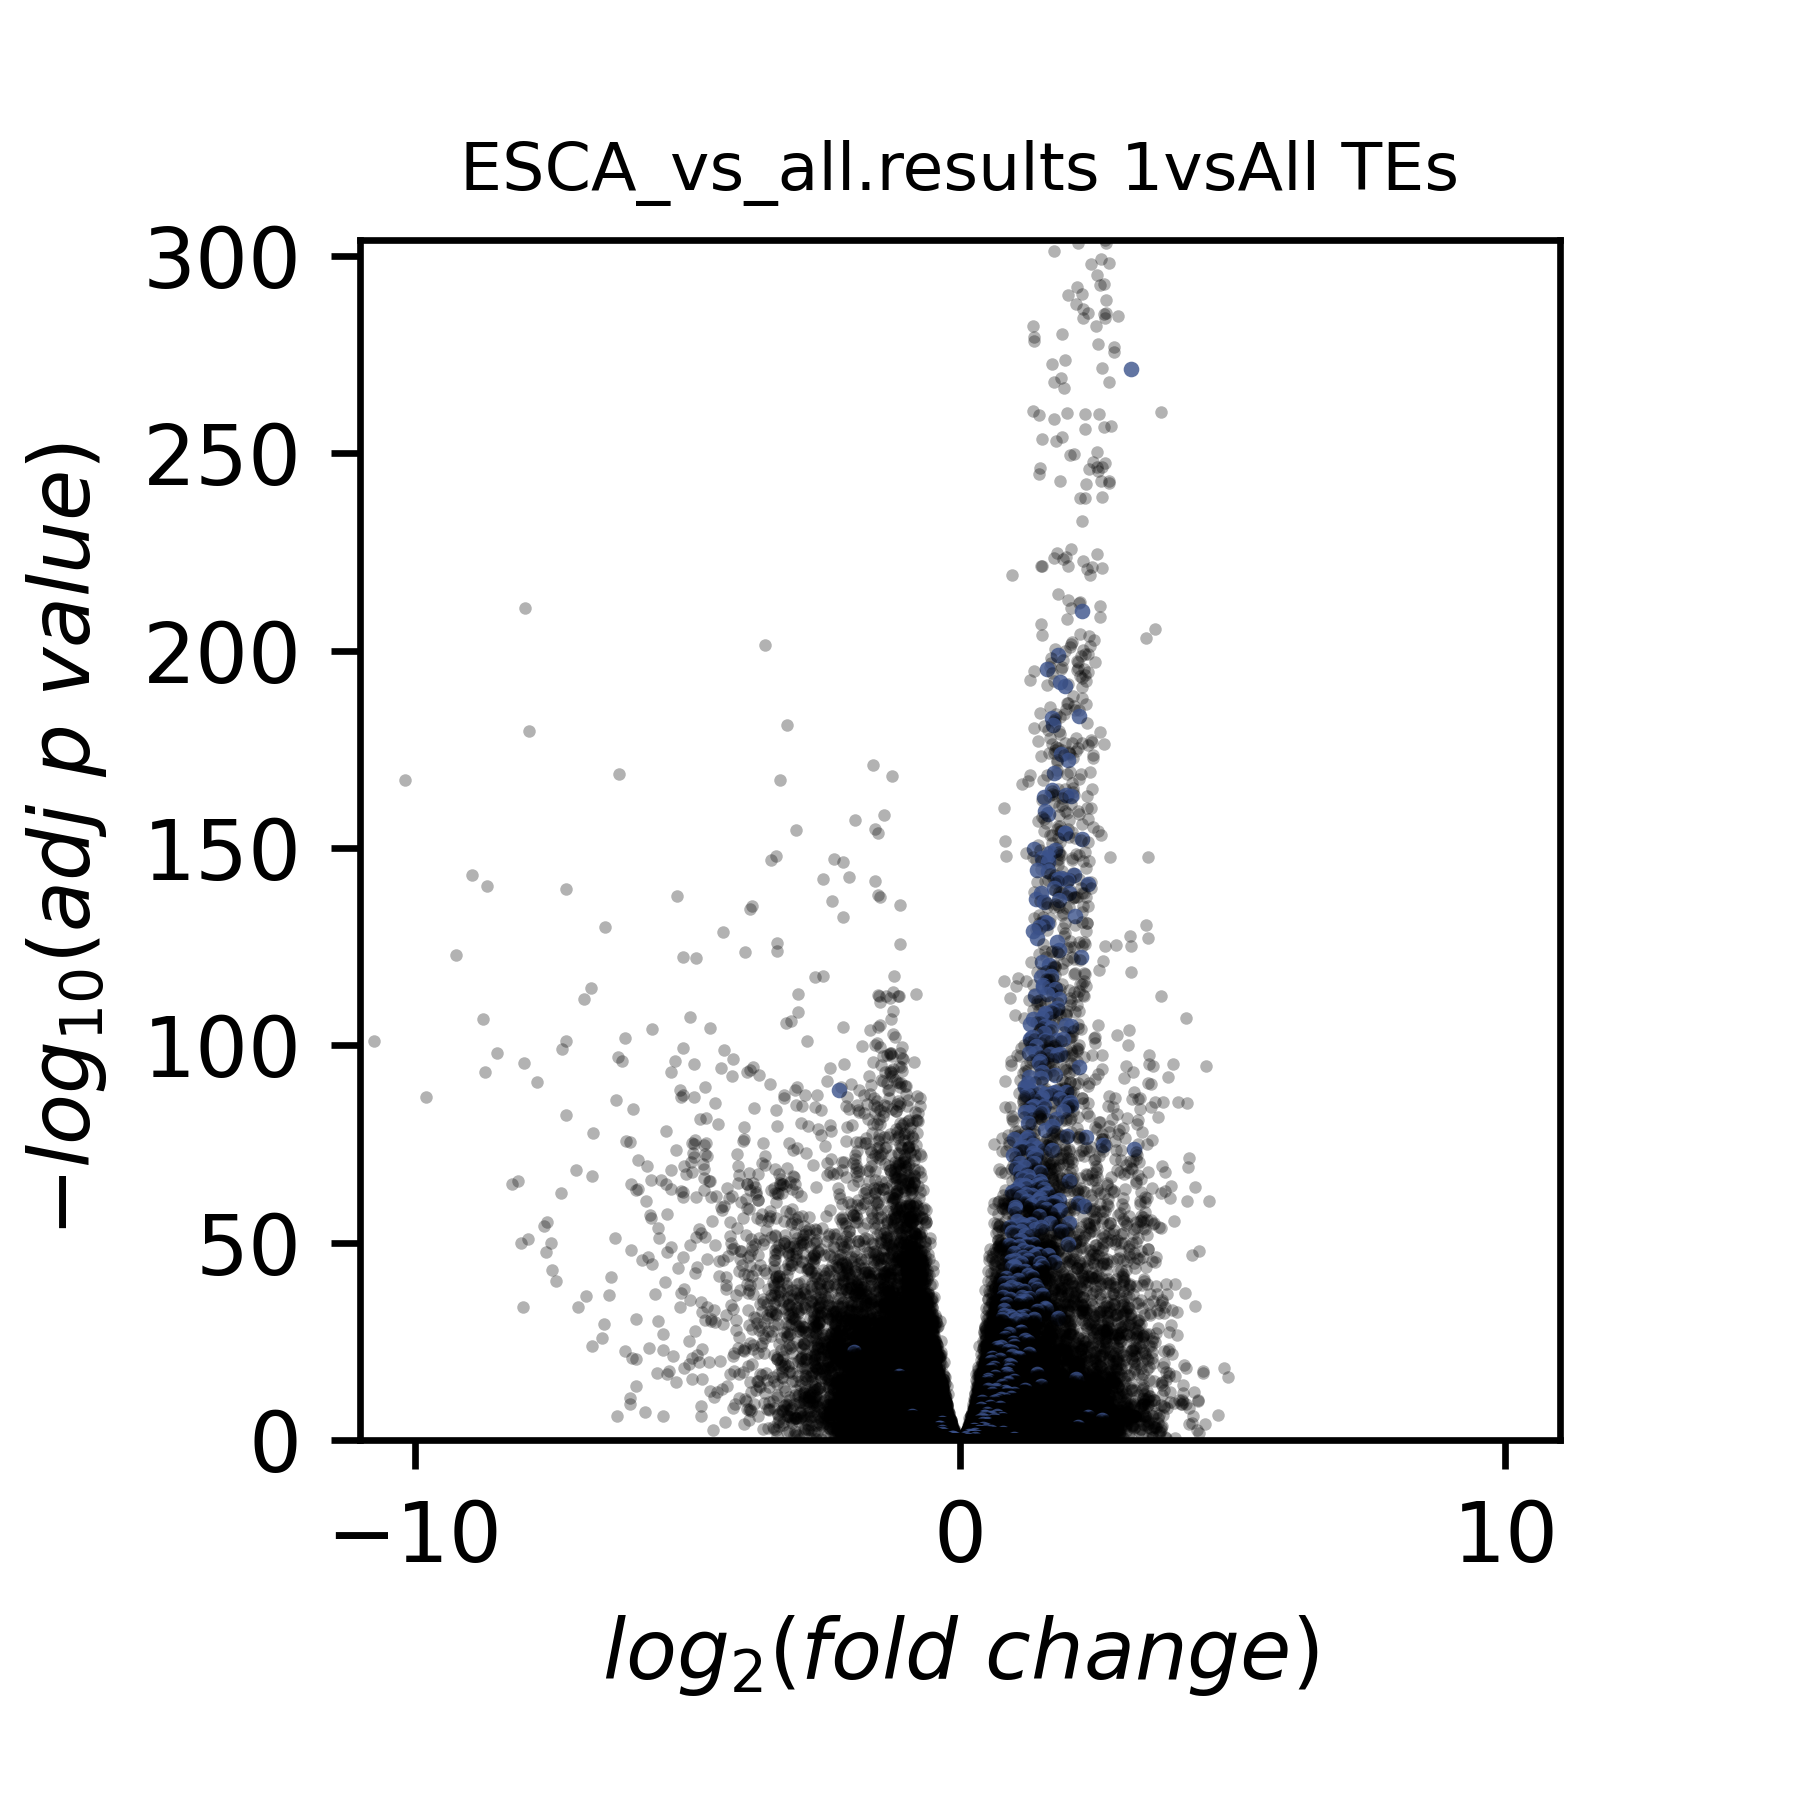

In [9]:
%%time
def plotTEsNoNames(
    repeatDF : pd.DataFrame
    ):
    plotTitle = "{} 1vsAll TEs".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8

    # get names of TE's we want to color
    TECladeSet = set( ['SINE', 'LINE', 'LTR'] )
    selectTERows = repeatDF.loc[:, 'clade'].isin( TECladeSet )
    print(f'len(selectTERows) : {len(selectTERows)} sum : {selectTERows.sum()} ')
    TE_DF = repeatDF.loc[selectTERows, :]

    # save namesto temp file
    geneNamesPath = f'/scratch/aedavids/tmp/plotRepeatsGeneNames.txt'
    saveList(geneNamesPath, TE_DF.index.values, isSingleItemLine=True )

                    
    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=geneNamesPath,
                                  plotNames=False)
    
    
    return (exitStatus, imgFilePath)
    
      
################################################################################
# generate plot
exitStatus, imgFilePath = plotTEsNoNames(repeatDF)

# display
Image(imgFilePath) 

aedwip /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-named-TEs.png
len(selectTERows) : 15625 sum : 835 
arguments:
--inputFile /private/groups/kimlab/GTEx_TCGA/1vsAll/ESCA_vs_all.results \
                            --title 'ESCA_vs_all.results 1vsAll named TEs' \
                            --output /private/home/aedavids/extraCellularRNA/londonCalling2024/jupyterNotebooks/ESCA1vsAllVolcanoPlots.out/img/ESCA_vs_allresults-1vsAll-named-TEs.png  \
                            --numHeaderLines 8 \
                             --geneNamesFile /scratch/aedavids/tmp/plotRepeatsGeneNames.txt \
                            --label
exit status:['DEBUG cli.args.geneNamesFile:/scratch/aedavids/tmp/plotRepeatsGeneNames.txt', '############## AEDWIP plotNames:True']
CPU times: user 146 ms, sys: 31.6 ms, total: 178 ms
Wall time: 3min 6s


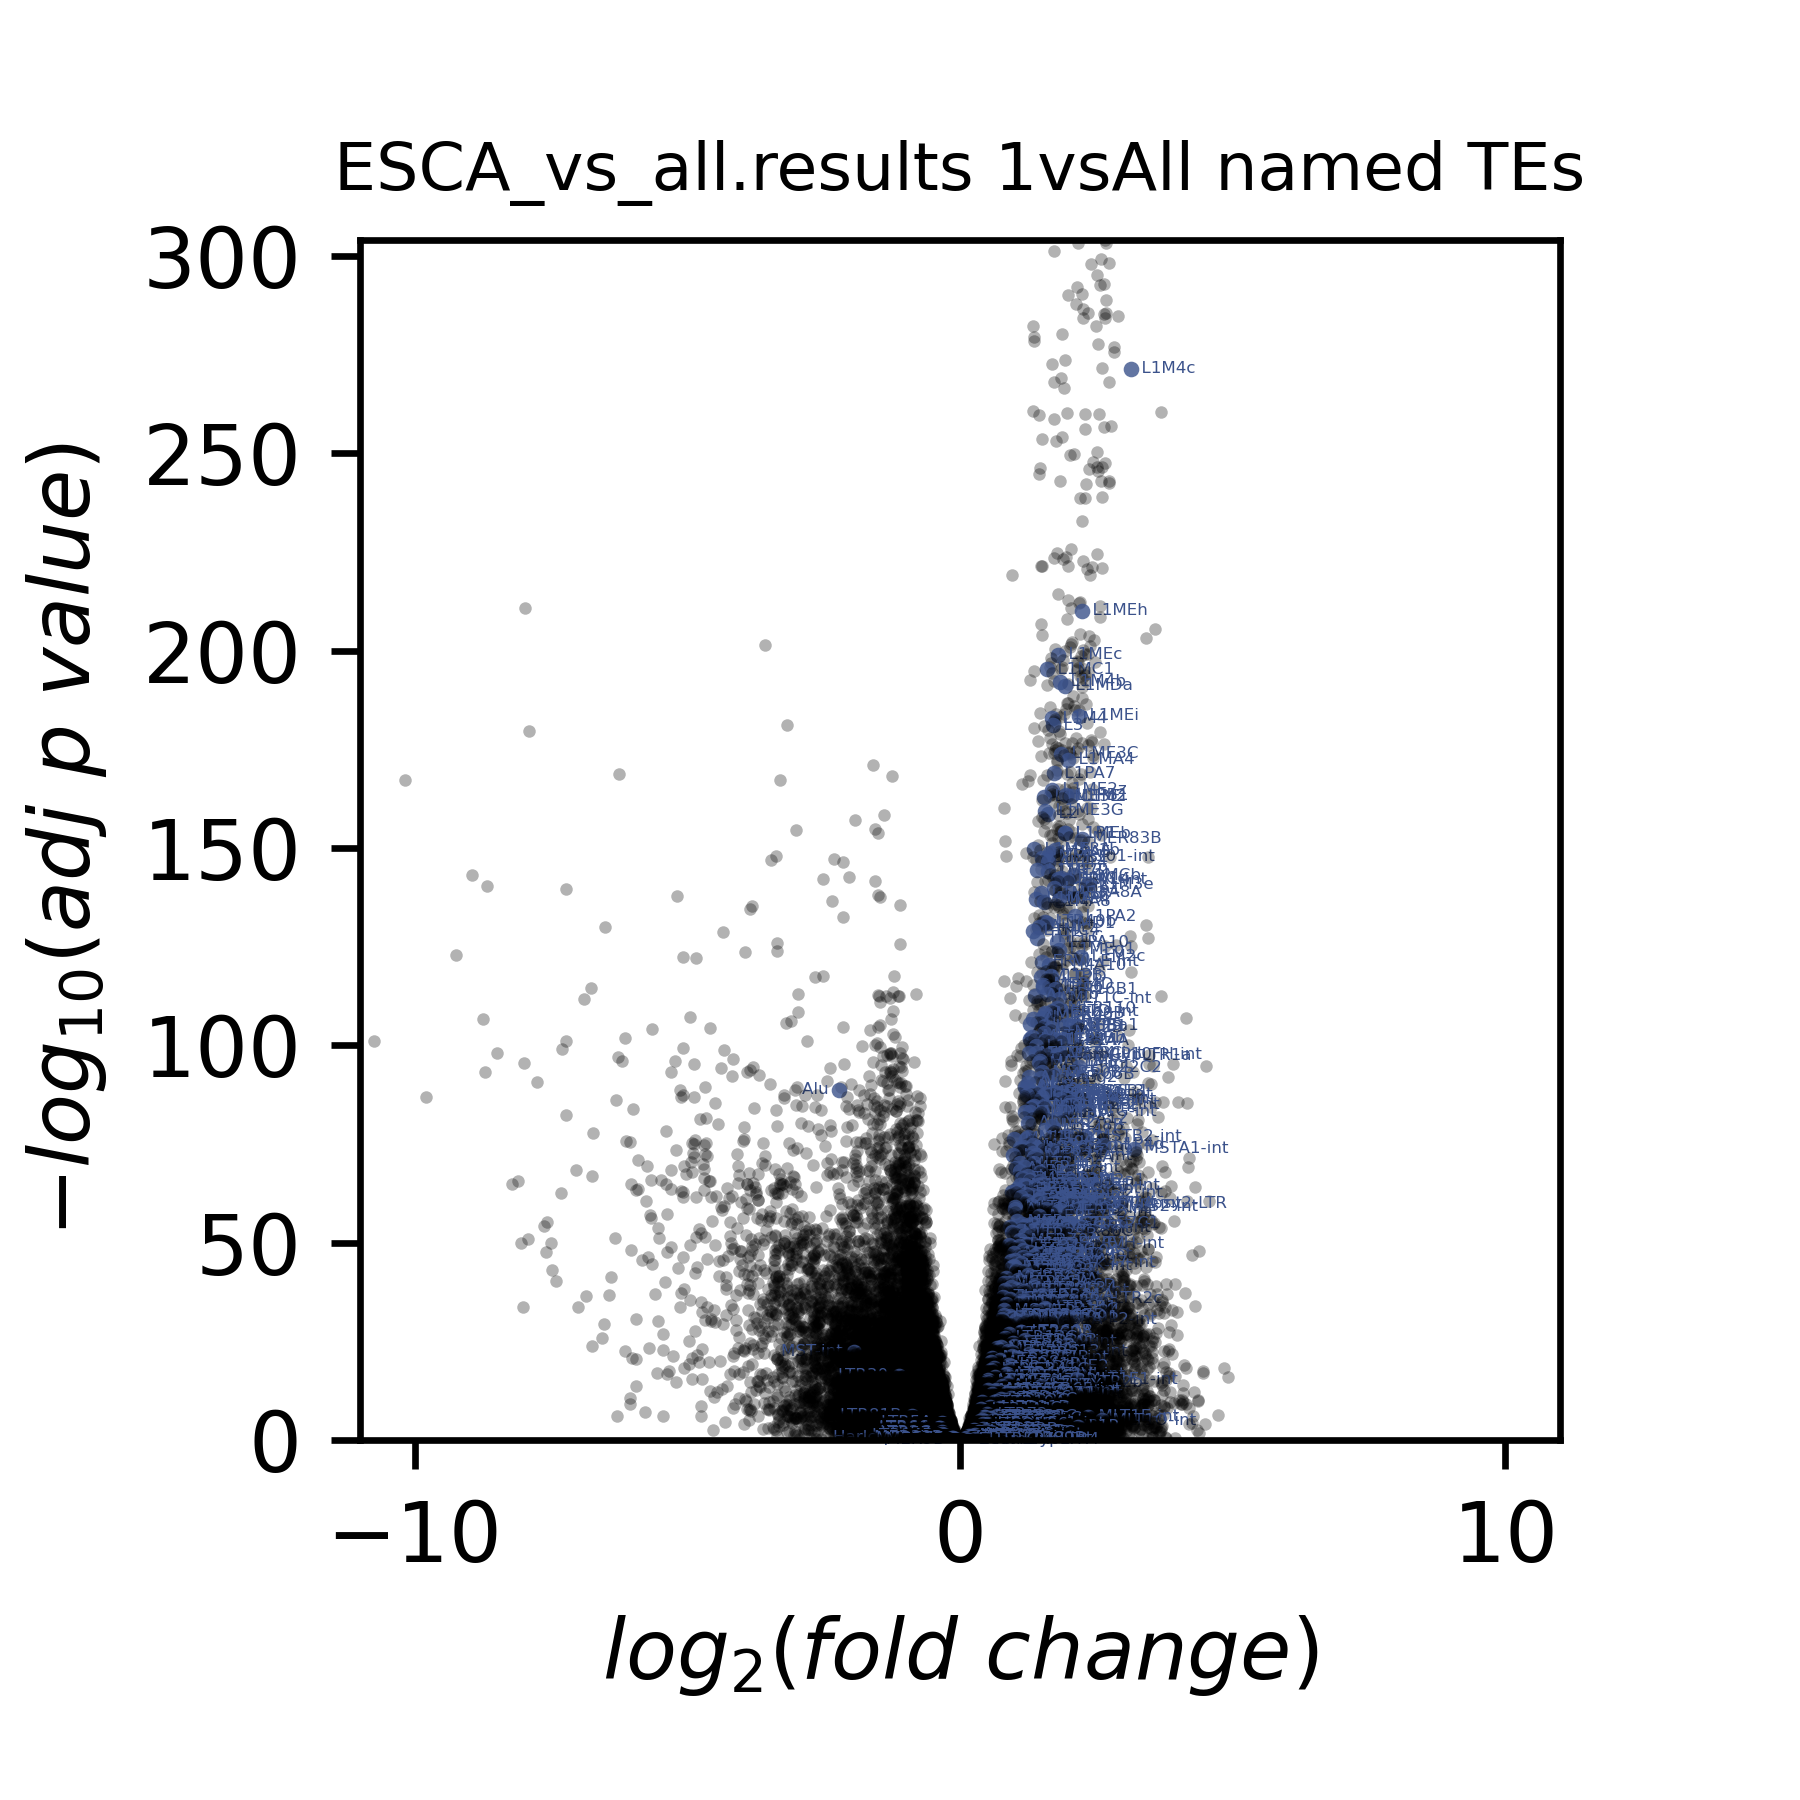

In [10]:
%%time
def plotTEsWitNames(
    repeatDF : pd.DataFrame
    ):
    plotTitle = "{} 1vsAll named TEs".format(deseqResultsFileName)
    imgFilePath = imgOut +"/" + urlify(plotTitle) + ".png" 
    print(f'aedwip {imgFilePath}')
    numHeaderLines = 8

    # get names of TE's we want to color
    TECladeSet = set( ['SINE', 'LINE', 'LTR'] )
    selectTERows = repeatDF.loc[:, 'clade'].isin( TECladeSet )
    print(f'len(selectTERows) : {len(selectTERows)} sum : {selectTERows.sum()} ')
    TE_DF = repeatDF.loc[selectTERows, :]

    # save namesto temp file
    geneNamesPath = f'/scratch/aedavids/tmp/plotRepeatsGeneNames.txt'
    saveList(geneNamesPath, TE_DF.index.values, isSingleItemLine=True )

                    
    # plot
    exitStatus = createVolcanoPlot(deseqResultsFilePath, 
                                   imgFilePath, 
                                   numHeaderLines, 
                                   plotTitle, 
                                   geneNamesPath=geneNamesPath,
                                  plotNames=True)
    
    
    return (exitStatus, imgFilePath)
    
      
################################################################################
# generate plot
exitStatus, imgFilePath = plotTEsWitNames(repeatDF)

# display
Image(imgFilePath) 